# Example 6 - exploring National Grid datafeeds

LW's friend Ayrton has created a python wrapper for a National Grid API:  
https://github.com/AyrtonB/NGDataPortal  
In this notebook the capabilities of the wrapper will be explored.

In [1]:
# !pip install NGDataPortal pandas requests matplotlib

In [2]:
from NGDataPortal import Wrapper
from pathlib import Path
Path("output").mkdir(parents=True, exist_ok=True)

In [3]:
stream = 'generation-mix-national'
wrapper = Wrapper(stream)


In [4]:

df = wrapper.query_API()
df.head()

{}


,_id,dateTime_from,dateTime_to,biomass_perc,coal_perc,imports_perc,gas_perc,nuclear_perc,other_perc,hydro_perc,solar_perc,wind_perc
0,1,2020-02-27T14:30:00,2020-02-27T15:00:00,5.8,2.2,4.4,34.9,12.2,0.0,1.3,12.8,26.4
1,2,2020-02-27T14:00:00,2020-02-27T14:30:00,5.7,2.2,4.0,35.4,11.9,0.2,1.3,13.1,26.2
2,3,2020-02-27T13:30:00,2020-02-27T14:00:00,5.6,2.1,1.7,36.3,11.5,0.2,1.3,12.9,28.4
3,4,2020-02-27T13:00:00,2020-02-27T13:30:00,5.3,2.2,1.6,36.8,11.1,0.2,1.2,12.8,28.8
4,5,2020-02-27T12:30:00,2020-02-27T13:00:00,5.2,2.3,2.8,36.4,11.0,0.3,1.2,12.5,28.3


In [5]:
import json

In [6]:
# Inspecting package, I can see a list of streams:
{"contracted-energy-volumes-and-data": "6c33447d-4e15-448d-9ed0-4516a35657a4", "firm-frequency-response-auction-results": "340ae31e-b010-46fc-af87-e89778d438ef", "fast-reserve-tender-reports": "7f9357b2-0591-45d9-8e0d-0bd7d613a5ff", "balancing-services-charging-report-bcr": "06806fef-a9b8-40d7-bbb5-105d662eac14", "current-balancing-services-use-of-system-bsuos-data": "2c05a930-13c2-400f-bd3b-a7e6fb9f61cf", "weekly-wind-availability": "bb375594-dd0b-462b-9063-51e93c607e41", "mbss": "eb3afc32-fe39-4f33-8808-95b4463e20f8", "firm-frequency-response-market-information": "fa1c517f-44e5-470f-813c-5f690dc463fe", "balancing-services-use-of-system-bsuos-daily-cost": "b19a3594-3647-4d06-a119-7d97d538d496", "outturn-voltage-costs": "1b47a532-9f22-49c1-ae2a-d84dcc6d7408", "fast-reserve-market-information-reports": "37e68cbc-ac83-4e52-b10c-b4c49553365f", "bsuos-monthly-cost": "0d638634-1285-41ac-b965-d0e06964a302", "bsuos-monthly-forecast": "a7c7711a-fac4-4bb9-bf23-abea5a2ea616", "short-term-operating-reserve-stor": "ef2bbb5f-ee5c-40c3-bd4b-5a36d1d5f5dc", "system-frequency-data": "f0933bdd-1b0e-4dd3-aa7f-5498df1ba5b9", "short-term-operating-reserve-tender-reports": "88ef0c84-83c5-4c84-9846-6fd44d8a6037", "daily-wind-availability": "7aa508eb-36f5-4298-820f-2fa6745ae2e7", "historic-demand-data": "11252656-007c-45a4-87db-9d5cc6e8535a", "weekly-opmr": "693ca90e-9d48-4a29-92ad-0bf007bba5c2", "daily-opmr": "0eede912-8820-4c66-a58a-f7436d36b95f", "2-day-ahead-demand-forecast": "cda26f27-4bb6-4632-9fb5-2d029ca605e1", "day-ahead-constraint-flows-and-limits": "d7d4ea81-c14d-41a0-8ed2-f281ae9df8d7", "disaggregated-bsad": "48fbc6ea-381e-40d6-9633-d1be09a89a0b", "aggregated-bsad": "cfb65cd4-e41c-4587-9c78-31004827bee6", "balancing-services-adjustment-data-forward-contracts": "7ce8164f-0f0c-4940-b821-ca232e2eefaf", "thermal-constraint-costs": "d195f1d8-7d9e-46f1-96a6-4251e75e9bd0", "daily-demand-update": "177f6fa4-ae49-4182-81ea-0c6b35f26ca6", "balancing-services-use-of-system-bsuos-daily-forecast": "c1be6c7c-c36d-46cb-8038-098075599bb0", "obligatory-reactive-power-service-orps-utilisation": "d91e4fd2-1f27-4d0b-8473-b4b19af7f3dc", "7-day-ahead-national-forecast": "70d3d674-15a6-4e41-83b4-410440c0b0b9", "firm-frequency-response-post-tender-reports": "e692dc29-e94c-4be7-8067-4fc6af8bab22", "upcoming-trades": "48f96ddb-1038-4760-8a39-608713ba163f", "day-ahead-wind-forecast": "b2f03146-f05d-4824-a663-3a4f36090c71", "1-day-ahead-demand-forecast": "aec5601a-7f3e-4c4c-bf56-d8e4184d3c5b", "embedded-wind-and-solar-forecasts": "db6c038f-98af-4570-ab60-24d71ebd0ae5", "generation-mix-national": "0a168493-5d67-4a26-8344-2fe0a5d4d20b"}

{'contracted-energy-volumes-and-data': '6c33447d-4e15-448d-9ed0-4516a35657a4',
 'firm-frequency-response-auction-results': '340ae31e-b010-46fc-af87-e89778d438ef',
 'fast-reserve-tender-reports': '7f9357b2-0591-45d9-8e0d-0bd7d613a5ff',
 'balancing-services-charging-report-bcr': '06806fef-a9b8-40d7-bbb5-105d662eac14',
 'current-balancing-services-use-of-system-bsuos-data': '2c05a930-13c2-400f-bd3b-a7e6fb9f61cf',
 'weekly-wind-availability': 'bb375594-dd0b-462b-9063-51e93c607e41',
 'mbss': 'eb3afc32-fe39-4f33-8808-95b4463e20f8',
 'firm-frequency-response-market-information': 'fa1c517f-44e5-470f-813c-5f690dc463fe',
 'balancing-services-use-of-system-bsuos-daily-cost': 'b19a3594-3647-4d06-a119-7d97d538d496',
 'outturn-voltage-costs': '1b47a532-9f22-49c1-ae2a-d84dcc6d7408',
 'fast-reserve-market-information-reports': '37e68cbc-ac83-4e52-b10c-b4c49553365f',
 'bsuos-monthly-cost': '0d638634-1285-41ac-b965-d0e06964a302',
 'bsuos-monthly-forecast': 'a7c7711a-fac4-4bb9-bf23-abea5a2ea616',
 'short

In [7]:
stream = 'daily-wind-availability'
wrapper = Wrapper(stream)
df = wrapper.query_API()
df.head()

{'resource_id': '0a168493-5d67-4a26-8344-2fe0a5d4d20b'}


,_id,BMU_ID,Date,MW
0,1,ABRBO-1,2020-02-19T00:00:00,0
1,2,ABRBO-1,2020-02-20T00:00:00,0
2,3,ABRBO-1,2020-02-21T00:00:00,0
3,4,ABRBO-1,2020-02-22T00:00:00,0
4,5,ABRBO-1,2020-02-23T00:00:00,0


## Plot availability of one wind farm 

Text(0, 0.5, 'MW of Wind Available')

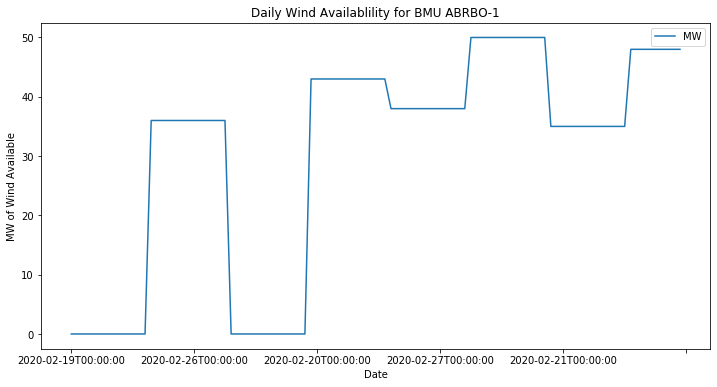

In [8]:
ax = df.plot('Date', 'MW', figsize=(12, 6), title='Daily Wind Availablility for BMU ABRBO-1')
ax.set_ylabel("MW of Wind Available")


## Plot total wind availability
Need to define a larer query - try using start and end dates

In [9]:
stream = 'daily-wind-availability'
wrapper = Wrapper(stream)

from datetime import datetime
from datetime import timedelta
start_date = datetime.today()
end_date = start_date + timedelta(days=10)
dt_col = 'Date'
df = wrapper.query_API(start_date=start_date.strftime('%Y-%m-%d'), end_date=end_date.strftime('%Y-%m-%d'), dt_col=dt_col)

{'resource_id': '7aa508eb-36f5-4298-820f-2fa6745ae2e7', 'sql': 'SELECT * from "7aa508eb-36f5-4298-820f-2fa6745ae2e7" WHERE "Date" BETWEEN \'2020-02-27\'::timestamp AND \'2020-03-08\'::timestamp ORDER BY "Date"'}


In [10]:
len(df)

890

In [11]:
df

,Date,BMU_ID,_id,_full_text,MW
0,2020-02-27T00:00:00,EARBW-1,932,"'-02':4 '-1':2 '-27':5 '00':7,8 '2020':3 '35':...",35
1,2020-02-27T00:00:00,EAAO-2,919,"'-02':4 '-2':2 '-27':5 '0':9 '00':7,8 '2020':3...",0
2,2020-02-27T00:00:00,CAIRW-1,477,"'-02':4 '-1':2 '-27':5 '00':7,8 '2020':3 '51':...",51
3,2020-02-27T00:00:00,WLNYO-3,2258,"'-02':4 '-27':5 '-3':2 '00':7,8 '2020':3 '330'...",330
4,2020-02-27T00:00:00,EAAO-1,906,"'-02':4 '-1':2 '-27':5 '00':7,8 '2020':3 '305'...",305
...,...,...,...,...,...
885,2020-03-02T00:00:00,BLLA-1,312,"'-02':5 '-03':4 '-1':2 '00':7,8 '118':9 '2020'...",118
886,2020-03-02T00:00:00,CAIRW-1,481,"'-02':5 '-03':4 '-1':2 '00':7,8 '2020':3 '51':...",51
887,2020-03-02T00:00:00,PTLDW-1,1846,"'-02':5 '-03':4 '-1':2 '00':7,8 '13':9 '2020':...",13
888,2020-03-02T00:00:00,ASHWW-1,156,"'-02':5 '-03':4 '-1':2 '00':7,8 '2020':3 '35':...",35


In [12]:
import pandas as pd

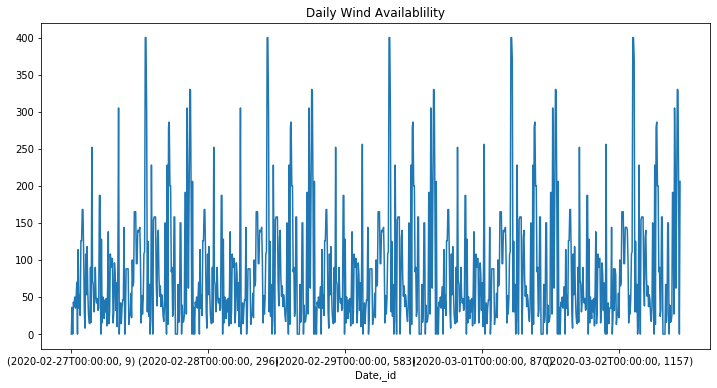

In [13]:
wind_availability = df.groupby(['Date', '_id']).sum()['MW'].astype('int32')
plot = wind_availability.plot(figsize=(12, 6), title='Daily Wind Availablility')
plot.get_figure().savefig('output/daily_wind_availability.png')
df.to_csv('daily-wind-availability.csv')

## 2 day ahead demand forecast

In [14]:
stream = '2-day-ahead-demand-forecast'
wrapper = Wrapper(stream)
df = wrapper.query_API()
df

{'resource_id': '7aa508eb-36f5-4298-820f-2fa6745ae2e7'}


,_id,DAYSAHEAD,TARGETDATE,FORECASTDEMAND,CARDINALPOINT,CP_TYPE,CP_ST_TIME,CP_END_TIME,F_Point
0,1,2,20200227,27455,1F,F,30,30,
1,2,2,20200227,27643,1A,P,100,230,
2,3,2,20200227,26642,3,F,300,300,
3,4,2,20200227,26118,4,F,400,400,
4,5,2,20200227,25881,1B,T,430,730,Om
5,6,2,20200227,39999,2F,P,800,900,
6,7,2,20200227,40020,2A,P,930,1030,DM
7,8,2,20200227,37649,2B,P,1100,1300,
8,9,2,20200227,34900,3B,T,1330,1630,Dm
9,10,2,20200227,43632,DP,P,1700,1930,EM


## 1 day ahead demand forecast

In [15]:
stream = '1-day-ahead-demand-forecast'
wrapper = Wrapper(stream)
df = wrapper.query_API()
df

{'resource_id': 'cda26f27-4bb6-4632-9fb5-2d029ca605e1'}


,_id,DAYSAHEAD,TARGETDATE,FORECASTDEMAND,CARDINALPOINT,CP_TYPE,CP_ST_TIME,CP_END_TIME,F_Point
0,1,1,20200228,27721,1F,F,30,30,
1,2,1,20200228,27905,1A,P,100,230,
2,3,1,20200228,26590,3,F,300,300,
3,4,1,20200228,26027,4,F,400,400,
4,5,1,20200228,25875,1B,T,430,730,Om
5,6,1,20200228,39884,2F,P,800,900,
6,7,1,20200228,40767,2A,P,930,1030,
7,8,1,20200228,41261,2B,P,1100,1300,DM
8,9,1,20200228,39624,3B,T,1330,1630,Dm
9,10,1,20200228,42299,DP,P,1700,1930,EM


In [16]:
if df['FORECASTDEMAND'].max() > 50000:
    print(f"Big electricity use day tomorrow: {df['FORECASTDEMAND'].max()}MW")
else:
    print(f"Peak electricity demand forecast tomorrow: {df['FORECASTDEMAND'].max()}MW")

Peak electricity demand forecast tomorrow: 42299MW


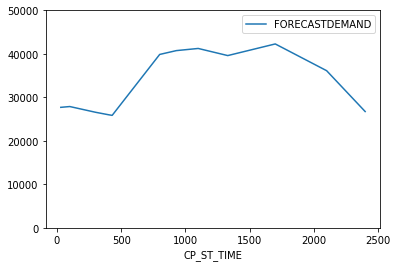

In [17]:
df[['CP_ST_TIME', 'FORECASTDEMAND']].plot('CP_ST_TIME', 'FORECASTDEMAND', ylim = (0, 50000))

## freeze requirements

In [18]:
# !pip freeze > requirements.txt